## G-CARE Benchmark

In [73]:
using Graphs: DiGraph
using StatsPlots
include("Source/datasets.jl")
include("Source/QuasiStableCardinalityEstimator.jl")

get_cardinality_bounds (generic function with 1 method)

In [2]:
aids_data_file_path = "dataset/aids/aids.txt"
human_data_file_path = "dataset/human/human.txt"
lubm80_data_file_path = "dataset/lubm80/lubm80.txt"
yago_data_file_path = "dataset/yago/yago.txt"

human_data = load_dataset(human_data_file_path)
aids_data = load_dataset(aids_data_file_path)
#lubm80_data = load_dataset(lubm80_data_file_path)
#yago_data = load_dataset(yago_data_file_path)
nothing

In [76]:
#datasets = [aids_data, human_data, lubm80_data, yago_data]
#dataset_names = ["aids", "human", "lubm80", "yago"]
datasets = Dict("aids"=>aids_data, "human"=>human_data)
dataset_names = ["aids", "human"]
num_sample_nodes = Dict("aids"=>10000, "human"=>100)
max_cycle_size = Dict("aids"=>6, "human"=>-1)

Dict{String, Int64} with 2 entries:
  "aids"  => 6
  "human" => -1

In [77]:
build_time = Dict()
summary_size = Dict()
color_summaries = Dict()
hash_color_summaries = Dict()
no_color_summaries = Dict()
degree_color_summaries = Dict()
num_colors = 32
for dataset in dataset_names
    degree_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], num_sample_nodes=num_sample_nodes[dataset], partitioner="Degree")
    results = @timed generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], num_sample_nodes=num_sample_nodes[dataset])
    build_time[dataset] = results[2]
    summary_size[dataset] = get_color_summary_size(results[1])
    color_summaries[dataset] = results[1]
    hash_color_summaries[dataset] = generate_color_summary(datasets[dataset], num_colors, verbose=true, max_size = max_cycle_size[dataset], num_sample_nodes=num_sample_nodes[dataset], partitioner="Hash")
    no_color_summaries[dataset] = generate_color_summary(datasets[dataset], 1, verbose=true, max_size = max_cycle_size[dataset], num_sample_nodes=num_sample_nodes[dataset])
end

Generating Cycles of Size: 2
Generating Cycles of Size: 

3


Generating Cycles of Size: 4
Generating Cycles of Size: 

5


Generating Cycles of Size: 6
Started bloom filters


Finished bloom filters
Started cardinality counts
Finished cardinality counts


Started tracking statistics
Finished tracking statistics


Generating Cycles of Size: 2
Generating Cycles of Size: 3
Generating Cycles of Size: 

4


Generating Cycles of Size: 5
Generating Cycles of Size: 

6


Started coloring


Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Generating Cycles of Size: 2
Generating Cycles of Size: 

3


Generating Cycles of Size: 4
Generating Cycles of Size: 

5


Generating Cycles of Size: 6
Started bloom filters


Finished bloom filters
Started cardinality counts
Finished cardinality counts


Started tracking statistics
Finished tracking statistics


Generating Cycles of Size: 2


Generating Cycles of Size: 3
Generating Cycles of Size: 

4


Generating Cycles of Size: 5
Generating Cycles of Size: 

6


Started coloring


Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts


Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Started bloom filters
Finished bloom filters
Started cardinality counts
Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Started coloring


Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts
Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Started bloom filters
Finished bloom filters
Started cardinality counts
Finished cardinality counts
Started tracking statistics


Finished tracking statistics
Started coloring
Finished coloring
Started bloom filters
Finished bloom filters
Started cardinality counts
Finished cardinality counts
Started tracking statistics


Finished tracking statistics


In [79]:
query_directories = Dict()
query_directories["human"] = ["/queryset/human/Chain_3/",
                                "/queryset/human/Graph_3/",
                                "/queryset/human/Star_3/",
                                "/queryset/human/Tree_3/"]
query_directories["aids"] = ["/queryset/aids/Chain_3/",
                                "/queryset/aids/Chain_6/",
                                "/queryset/aids/Chain_9/",
                                "/queryset/aids/Chain_12/",
                                "/queryset/aids/Cycle_3/",
                                "/queryset/aids/Cycle_6/",
                                "/queryset/aids/Flower_6/",
                                "/queryset/aids/Flower_9/",
                                "/queryset/aids/Flower_12/",
                                "/queryset/aids/Graph_3/",
                                "/queryset/aids/Graph_6/",
                                "/queryset/aids/Graph_9/",
                                "/queryset/aids/Graph_12/",
                                "/queryset/aids/Petal_6/",
                                "/queryset/aids/Petal_9/",
                                "/queryset/aids/Petal_12/",
                                "/queryset/aids/Star_3/",
                                "/queryset/aids/Star_6/",
                                "/queryset/aids/Star_9/",
                                "/queryset/aids/Tree_3/",
                                "/queryset/aids/Tree_6/",
                                "/queryset/aids/Tree_9/",
                                "/queryset/aids/Tree_12/"]

query_paths = Dict()
for dataset in dataset_names
    query_paths[dataset] = [readdir(pwd() * dir, join=true) for dir in query_directories[dataset]]
    query_paths[dataset] = [(query_paths[dataset]...)...]
end
exact_sizes = Dict(dataset => [] for dataset in dataset_names)
bounds = Dict(dataset => [] for dataset in dataset_names)
bounds_with_stats = Dict(dataset => [] for dataset in dataset_names)
bounds_with_hash = Dict(dataset => [] for dataset in dataset_names)
bounds_with_no_color = Dict(dataset => [] for dataset in dataset_names)
bounds_with_degree = Dict(dataset => [] for dataset in dataset_names)
query_types = Dict(dataset => [] for dataset in dataset_names)
for dataset in dataset_names
    println("---------------------------------------------------------------------------------------------")
    println("Running ", dataset)
    for query_path in query_paths[dataset]
        println("Query: ", query_path)
        id_and_query = load_query(query_path)
        id = id_and_query[1]
        query = id_and_query[2]
        bound_results = @timed get_cardinality_bounds(query, color_summaries[dataset], usingStoredStats=false)
        bound_results_with_stats = get_cardinality_bounds(query, color_summaries[dataset], usingStoredStats=true)
        bound_results_with_hash = get_cardinality_bounds(query, hash_color_summaries[dataset], usingStoredStats=true)
        bound_results_with_no_color = get_cardinality_bounds(query, no_color_summaries[dataset], usingStoredStats=true)
        bound_results_with_degree = get_cardinality_bounds(query, degree_color_summaries[dataset], usingStoredStats=true)
        #exact_size_results = @timed get_exact_size(query, datasets[dataset])
        gcare_size = load_true_cardinality(replace(query_path, "queryset"=>"TrueCardinalities"))
        query_type = match(r".*/queryset/.*/(.*)_.*/.*", query_path).captures[1]
        #if gcare_size != exact_size_results[1]
        #    println("Bad Exact Size Estimate!!")
        #    break
        #end
        bound_results[1][2] = max(1, bound_results[1][2])
        bound_results_with_stats[2] = max(1, bound_results_with_stats[2])
        bound_results_with_hash[2] = max(1, bound_results_with_hash[2])
        bound_results_with_no_color[2] = max(1, bound_results_with_no_color[2])
        bound_results_with_degree[2] = max(1, bound_results_with_degree[2])
        push!(exact_sizes[dataset], gcare_size)
        push!(bounds[dataset], bound_results[1])
        push!(bounds_with_stats[dataset], bound_results_with_stats)
        push!(bounds_with_hash[dataset], bound_results_with_hash)
        push!(bounds_with_no_color[dataset], bound_results_with_no_color)
        push!(bounds_with_degree[dataset], bound_results_with_degree)
        push!(query_types[dataset], query_type)
    end
end
relative_errors = Dict(dataset => bounds[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_stats = Dict(dataset => bounds_with_stats[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_hash = Dict(dataset => bounds_with_hash[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_no_color = Dict(dataset => bounds_with_no_color[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)
relative_errors_with_degree = Dict(dataset => bounds_with_degree[dataset] ./ exact_sizes[dataset] for dataset in dataset_names)

---------------------------------------------------------------------------------------------
Running aids
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_0_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_1_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_1_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_1_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_1_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_1_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_13.tx

Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_5_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_0_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_0_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_0_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_0_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_0_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_1_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_1_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_1_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_1_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_2_10.txt
Query: /home/kylebd99/Cardi

Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_2_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_3_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_3_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_3_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_3_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_3_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_3_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_3_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_3_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_3_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_3_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_1.txt
Query: /home/kylebd99/Cardi

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_15.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_16.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_17.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_4_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_13.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_14.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_15.txt
Query: /home/kylebd99/Cardina

Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_6/uf_Q_5_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_2_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_13.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_14.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_8.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_13.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_14.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_15.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_16.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_17.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_18.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_19.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_5.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_5_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_3_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_3_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_3_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_11.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_5.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_4_9.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_7.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_12/uf_Q_5_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_6.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_7.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_8.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_9.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_10.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_11.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_12.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_13.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_14.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_15.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_16.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_17.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_5.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_6.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_7.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_8.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_9.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_1.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_10.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_11.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_12.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_13.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_14.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_15.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_16.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_17.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_18.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_19.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_20.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_5.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_6.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_7.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_8.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_9.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_1_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_1_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_1_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_1_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_2_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_2_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_3_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_3_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_3_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_0_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_0_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_1_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_1_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_1_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_1_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_6.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_7.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_10.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_11.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_12.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_13.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_14.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_15.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_16.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_5.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_6.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_7.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_8.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_3_9.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_4_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_4_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_4_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_4_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_4_5.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_4_6.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_5_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_5_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_5_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_5_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_5_5.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_1_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_2_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_2_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_3_1.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_3_10.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_3_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_3_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_3_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_3_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_3_6.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_3_7.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_3_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_3_9.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_1.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_10.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_11.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_12.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_6.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_7.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_8.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_4_9.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_1.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_10.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_11.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_5.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_6.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_7.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_8.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_9/uf_Q_5_9.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_3_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_4_1.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_4_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_4_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_4_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_4_5.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_4_6.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_4_7.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_5_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_5_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_5_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_5_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_5_5.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_5_6.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_5_7.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_5_8.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_12/uf_Q_5_9.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_0_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_0_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_1_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_1_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_1_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_1_13.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_1_14.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_1_16.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_1_17.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_1_18.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_1_19.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_1_2.txt
Query: /home/kylebd99/Cardi

Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_2_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_2_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_2_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_2_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_2_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_2_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_13.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_5.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_7.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_8.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_9.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_17.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_5_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_0_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_1_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_3_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_3_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_3_8.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_4_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_4_18.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_4_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_4_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_4_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_5_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_5_10.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_5_14.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_5_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_6/uf_Q_5_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_9/uf_Q_0_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_9/uf_Q_0_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_9/uf_Q_1_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_12/uf_Q_0_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_2_1.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_2_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_2_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_2_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_2_5.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_2_6.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_2_7.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_2_8.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_2_9.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_10.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_11.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_12.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_13.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_5.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_6.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_7.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_8.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_3_9.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_1.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_10.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_11.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_12.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_13.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_14.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_15.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_16.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_17.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_18.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_19.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_20.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_4.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_5.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_6.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_7.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_8.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_4_9.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_5_1.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_5_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_5_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_5_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_6/uf_Q_5_5.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_9/uf_Q_2_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_9/uf_Q_3_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Petal_9/uf_Q_3_3.txt
Query: 

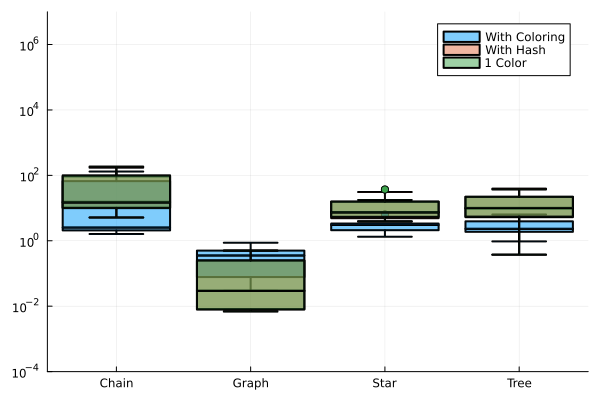

In [34]:
StatsPlots.boxplot(query_types["human"], [x[2] for x in relative_errors_with_stats["human"]],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Coloring", ylims=[10^-4, 10^7], yticks=[10^-4,10^-2, 1, 10^2, 10^4, 10^6])
StatsPlots.boxplot!(query_types["human"], [x[2] for x in relative_errors_with_hash["human"]],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Hash")
StatsPlots.boxplot!(query_types["human"], [x[2] for x in relative_errors_with_no_color["human"]],  yscale=:log10, fillalpha=0.5, linewidth=2, label="1 Color")

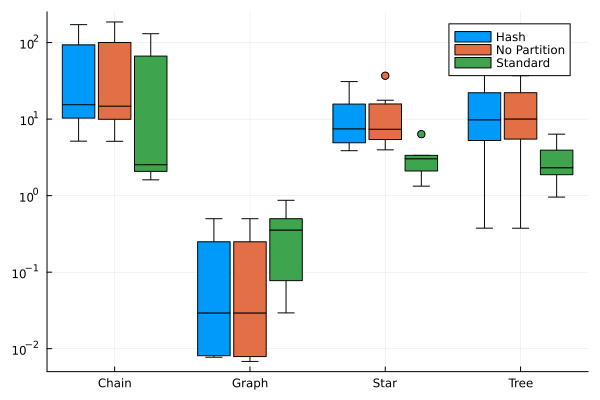

In [49]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["human"]]... [x[2] for x in relative_errors_with_hash["human"]]...  [x[2] for x in relative_errors_with_no_color["human"]]... ])
grouped_query_types = vec([query_types["human"]... query_types["human"]... query_types["human"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["human"])]... ["Hash" for _ in 1:length(query_types["human"])]... ["No Partition" for _ in 1:length(query_types["human"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10)

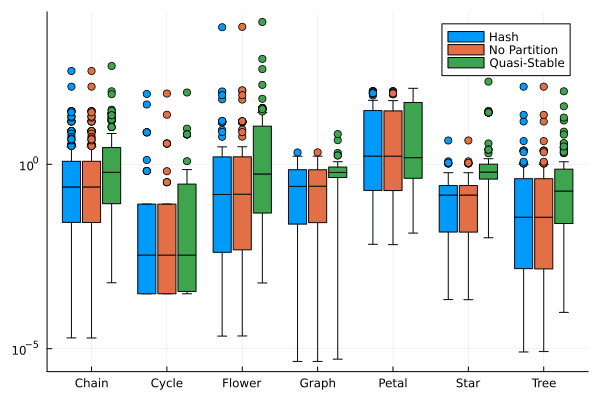

In [50]:
grouped_errors = vec([[x[2] for x in relative_errors_with_stats["aids"]]... [x[2] for x in relative_errors_with_hash["aids"]]...  [x[2] for x in relative_errors_with_no_color["aids"]]... ])
grouped_query_types = vec([query_types["aids"]... query_types["aids"]... query_types["aids"]...])
grouped_datasets = vec([["Quasi-Stable" for _ in 1:length(query_types["aids"])]... ["Hash" for _ in 1:length(query_types["aids"])]... ["No Partition" for _ in 1:length(query_types["aids"])]...])
groupedboxplot(grouped_query_types, grouped_errors, group = grouped_datasets, yscale =:log10)

In [46]:
grouped_errors

1×2334 Matrix{Float64}:
 0.378163  0.552231  0.606656  0.616097  …  0.290629  5.43459e-5  0.000150904

In [21]:
human_query_directories = ["/queryset/human/Chain_3/",
"/queryset/human/Graph_3/",
"/queryset/human/Star_3/",
"/queryset/human/Tree_3/",
                    ]
human_query_paths = [readdir(pwd() * dir, join=true) for dir in human_query_directories]
human_query_paths = [(human_query_paths...)...]
human_exact_sizes = []
human_bounds = []
human_bounds_with_stats = []
human_relative_errors = []
human_relative_errors_with_stats = []
human_relative_errors_with_hash = []
human_relative_errors_with_no_color = []
human_query_type = []
println("Summary Size: ", summary_size["human"])
println("Summary Build Time: ", build_time["human"])
for query_path in human_query_paths
    println("Query: ", query_path)
    id_and_query = load_query(query_path)
    id = id_and_query[1]
    query = id_and_query[2]
    bound_results = @timed get_cardinality_bounds(query, color_summaries["human"], usingStoredStats=false)
    bound_results_with_stats = @timed get_cardinality_bounds(query, color_summaries["human"], usingStoredStats=true)
    bound_results_with_hash = @timed get_cardinality_bounds(query, color_summaries["human"], usingStoredStats=true)
    bound_results_with_no_color = @timed get_cardinality_bounds(query, color_summaries["human"], usingStoredStats=true)
    exact_size_results = @timed get_exact_size(query, datasets["human"])
    gcare_size = load_true_cardinality(replace(query_path, "queryset"=>"TrueCardinalities"))
    query_type = match(r".*/queryset/human/(.*)_.*/.*", query_path).captures[1]
    if gcare_size != exact_size_results[1]
        println("Bad Exact Size Estimate!!")
        break
    end
    bound_results[1][2] = max(1, bound_results[1][2])
    bound_results_with_stats[1][2] = max(1, bound_results_with_stats[1][2])
    bound_results_with_hash[1][2] = max(1, bound_results_with_hash[1][2])
    bound_results_with_no_color[1][2] = max(1, bound_results_with_no_color[1][2])
    push!(human_exact_sizes, gcare_size)
    push!(human_bounds, bound_results[1])
    push!(human_bounds_with_stats, bound_results_with_stats[1])
    push!(human_relative_errors, bound_results[1] ./ gcare_size)
    push!(human_relative_errors_with_stats, bound_results_with_stats[1] ./ gcare_size)
    push!(human_relative_errors_with_hash,  bound_results_with_hash[1] ./ gcare_size)
    push!(human_relative_errors_with_no_color, bound_results_with_no_color[1] ./ gcare_size)
    push!(human_query_type, query_type)
end

Summary Size: nothing
Summary Build Time: 

2.320406185
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Chain_3/uf_Q_1_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/human/Chain_3/uf_Q_1_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Chain_3/uf_Q_1_3.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_0_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_0_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_0_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_0_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_0_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_0_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_1_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_1_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_1_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_1_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_2_2.txt
Query: /home/kylebd99/C

Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_3_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_3_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_3_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_3_5.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_3_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_3_7.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_3_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Graph_3/uf_Q_3_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_0_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_0_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_1_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_1_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_1_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_1_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_1_5.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_1_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_2_2.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Star_3/uf_Q_2_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Tree_3/uf_Q_0_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Tree_3/uf_Q_0_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/human/Tree_3/uf_Q_0_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Tree_3/uf_Q_1_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/human/Tree_3/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Tree_3/uf_Q_2_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Tree_3/uf_Q_2_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Tree_3/uf_Q_2_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/human/Tree_3/uf_Q_3_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/human/Tree_3/uf_Q_3_2.txt


In [6]:
using Statistics
println(maximum([log10(x[2]) for x in human_relative_errors]))
println(mean([abs(log10(x[2])) for x in human_relative_errors]))
println(minimum([log10(x[2]) for x in human_relative_errors]))

2.1162174132207614
0.6191122725795751
-1.5314789170422551


In [7]:
using Statistics
println(maximum([log10(x[2]) for x in human_relative_errors_with_stats]))
println(mean([abs(log10(x[2])) for x in human_relative_errors_with_stats]))
println(minimum([log10(x[2]) for x in human_relative_errors_with_stats]))

2.1162174132207614
0.6191122725795751
-1.5314789170422551


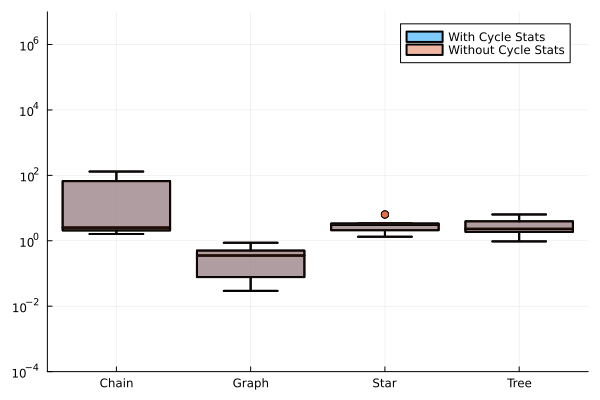

In [38]:
StatsPlots.boxplot(human_query_type, [x[2] for x in human_relative_errors_with_stats],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Coloring", ylims=[10^-4, 10^7], yticks=[10^-4,10^-2, 1, 10^2, 10^4, 10^6])
StatsPlots.boxplot!(human_query_type, [x[2] for x in human_relative_errors_with_hash],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Hash")
StatsPlots.boxplot!(human_query_type, [x[2] for x in human_relative_errors_with_no_color],  yscale=:log10, fillalpha=0.5, linewidth=2, label="1 Color")

In [52]:
include("Source/QuasiStableCardinalityEstimator.jl")

aids_query_directories = ["/queryset/aids/Chain_3/",
"/queryset/aids/Chain_6/",
"/queryset/aids/Chain_9/",
"/queryset/aids/Chain_12/",
"/queryset/aids/Cycle_3/",
"/queryset/aids/Cycle_6/",
"/queryset/aids/Flower_6/",
"/queryset/aids/Flower_9/",
"/queryset/aids/Flower_12/",
"/queryset/aids/Graph_3/",
"/queryset/aids/Graph_6/",
"/queryset/aids/Graph_9/",
"/queryset/aids/Graph_12/",
"/queryset/aids/Petal_6/",
"/queryset/aids/Petal_9/",
"/queryset/aids/Petal_12/",
"/queryset/aids/Star_3/",
"/queryset/aids/Star_6/",
"/queryset/aids/Star_9/",
"/queryset/aids/Tree_3/",
"/queryset/aids/Tree_6/",
"/queryset/aids/Tree_9/",
"/queryset/aids/Tree_12/"]
aids_query_paths = [readdir(pwd() * dir, join=true) for dir in aids_query_directories]
aids_query_paths = [(aids_query_paths...)...]
aids_exact_sizes = []
aids_bounds = []
aids_bounds_with_stats = []
aids_relative_errors = []
aids_relative_errors_with_stats = []
aids_query_types = []
println("Summary Size: ", summary_size["aids"])
println("Summary Build Time: ", build_time["aids"])
for query_path in aids_query_paths
    println("Query: ", query_path)
    id_and_query = load_query(query_path)
    id = id_and_query[1]
    query = id_and_query[2]
    query_type = match(r".*/queryset/aids/(.*)_.*/.*", query_path).captures[1]
    if query_type != "Cycle"
        continue
    end
    bound_results = @timed get_cardinality_bounds(query, color_summaries["aids"], usingStoredStats=false)
    bound_results_with_stats = @timed get_cardinality_bounds(query, color_summaries["aids"], usingStoredStats=true)
    gcare_size = load_true_cardinality(replace(query_path, "queryset"=>"TrueCardinalities"))
#    println("Bound Time: ", bound_results[2])
#    println("Exact Size: ", gcare_size)
#    println("Bound [Lower, Avg, Upper]: ", bound_results[1])
#    println("Relative Error [Lower, Avg, Upper]: ", bound_results[1]./gcare_size)
    bound_results[1][2] = max(1, bound_results[1][2])
    bound_results_with_stats[1][2] = max(1, bound_results_with_stats[1][2])
    push!(aids_exact_sizes, gcare_size)
    push!(aids_bounds, bound_results[1])
    push!(aids_bounds_with_stats, bound_results_with_stats[1])
    push!(aids_relative_errors, bound_results[1] ./ gcare_size)
    push!(aids_relative_errors_with_stats, bound_results_with_stats[1] ./ gcare_size)
    push!(aids_query_types, query_type)
end

Summary Size: nothing
Summary Build Time: 16.324041941


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_0_2.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_1_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_1_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_1_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_1_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_1_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_13.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_14.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_3/uf_Q_2_15.txt
Query: /home/kylebd99/Cardina


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_3_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Chain_9/uf_Q_4_13.txt
Query: /home/kylebd99/C

Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_6.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_1_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_1.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_12.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_13.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_14.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_15.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_16.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_17.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_5.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_2_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_1.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_12.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_13.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_14.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_15.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_16.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_17.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_18.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_19.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_20.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_4.txt
Query: 

/home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_7.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_3/uf_Q_3_9.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_1_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_1_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_1_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_1_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_2_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_2_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_3_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_3_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Cycle_6/uf_Q_3_3.txt


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_0_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_0_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_1_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_1_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_1_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_1_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Flower_6/uf_Q_2_6.txt
Query: /home/kyl


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_3_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_17.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_4_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Graph_3/uf_Q_5_1.txt
Query: /home/kylebd99/Ca


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_1_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_12.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Star_3/uf_Q_2_8.txt
Query: /home/kylebd99/Cardinality-wi


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_11.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_3_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_3/uf_Q_4_1.txt
Query: /home/kylebd99/Cardinality-wit


Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_4_14.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_4_2.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_4_3.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_4_4.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_4_5.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_4_6.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_4_7.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_4_8.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_4_9.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_5_1.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_5_10.txt
Query: /home/kylebd99/Cardinality-with-Colors/queryset/aids/Tree_12/uf_Q_5_11.txt
Query: /home/kylebd99/Ca

In [53]:
using Statistics
println(maximum([log10(x[2]) for x in aids_relative_errors]))
println(mean([log10(x[2]) for x in aids_relative_errors]))
println(mean([abs(log10(x[2])) for x in aids_relative_errors]))
println(minimum([log10(x[2]) for x in aids_relative_errors]))

-0.5710804428642713
-2.2745548988996602
2.2745548988996602


-3.390581878550435


In [12]:
using Statistics
println(maximum([log10(x[2]) for x in aids_relative_errors_with_stats]))
println(mean([log10(x[2]) for x in aids_relative_errors_with_stats]))
println(mean([abs(log10(x[2])) for x in aids_relative_errors_with_stats]))
println(minimum([log10(x[2]) for x in aids_relative_errors_with_stats]))

5.971966214181764
-0.05151823988047578


1.0055591829528019
-4.015694988526518


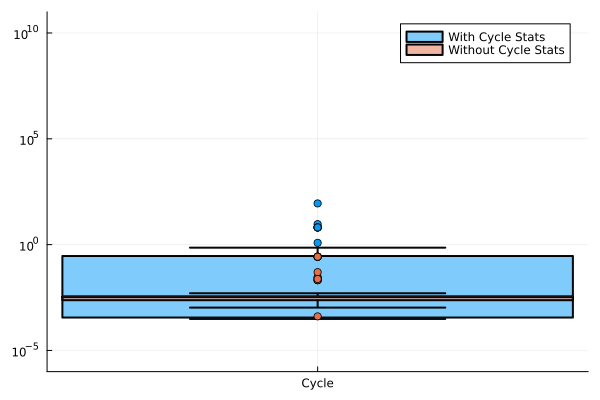

In [56]:
StatsPlots.boxplot(aids_query_types, [x[2] for x in aids_relative_errors_with_stats],  yscale=:log10, fillalpha=0.5, linewidth=2, label="With Cycle Stats", ylims=[10^-6, 10^11], yticks=[10^-5, 1, 10^5, 10^10])
StatsPlots.boxplot!(aids_query_types, [x[2] for x in aids_relative_errors],  yscale=:log10, fillalpha=0.5, linewidth=2, label="Without Cycle Stats")

In [63]:
print(data[!,"QueryType"])

Any["Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain", "Chain

lower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Flower", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "Graph", "G

In [ ]:
lubm80_query_paths = ["lubm80/lubm80_Q2.txt",
# "lubm80/lubm80_Q4.txt",
# "lubm80/lubm80_Q7.txt",
# "lubm80/lubm80_Q8.txt",
# "lubm80/lubm80_Q9.txt",
# "lubm80/lubm80_Q12.txt"
                    ]
exactSizes = []
bounds = []
relativeErrors = []
println("Summary Size: ", summary_size[1])
println("Summary Build Time: ", build_time[1])
for query_path in lubm80_query_paths
    println("Query: ", query_path)
    id_and_query = load_query("queryset/" * query_path)
    id = id_and_query[1]
    query = id_and_query[2]
    bound_results = @timed get_cardinality_bounds(query, color_summaries[1])
    exact_size_results = @timed get_exact_size(query, datasets[1])
    gcare_size = load_true_cardinality("TrueCardinalities/" * query_path)
    println("Bound Time: ", bound_results[2])
    println("Exact Size Time: ", exact_size_results[2])
    println("Exact Size: ", exact_size_results[1])
    println("GCare Exact Size: ", gcare_size)
    if gcare_size != exact_size_results[1]
        println("Bad Exact Size Estimate!!")
        break
    end
    println("Bound [Lower, Avg, Upper]: ", bound_results[1])
    println("Relative Error [Lower, Avg, Upper]: ", (bound_results[1])./exact_size_results[1])
    push!(exactSizes, gcare_size)
    push!(bounds, bound_results[1])
    push!(relativeErrors, bound_results[1] ./ gcare_size)
end

In [ ]:
exactSizes